In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

# Imports
import scipy as sp



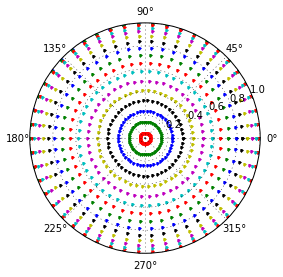

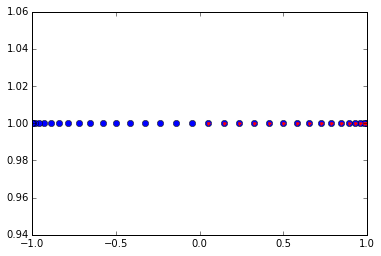

In [108]:
# Make a chebychev domain for the unit disk

## Domain in radius
Nr = 17
_Nr = 2 * Nr - 1
_jr = sp.arange(_Nr + 1)
_r = sp.cos(_jr * sp.pi / _Nr)
r = _r[:Nr]
plt.plot(_r, sp.ones_like(_r), linewidth=0.0, marker='o')
plt.plot(r, sp.ones_like(r), linewidth=0.0, marker='.', color='red')

## Domain in angle
Ntheta = 51
jtheta = sp.arange(Ntheta)  # includes theta = 0 = 2*pi 
theta = 2 * sp.pi * jtheta / (Ntheta - 1.0)

## Domain in both
rr, tt = sp.meshgrid(r, theta)
xx = rr * sp.cos(tt)
yy = rr * sp.sin(tt)


# Make a figure of the nodes
f0 = plt.figure(0)
f0.clear()
a0 = f0.add_axes([.1, .1, .8, .8], polar=True)
p0 = a0.plot(tt, rr, marker='.', linewidth=0)


/home/will/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/home/will/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide


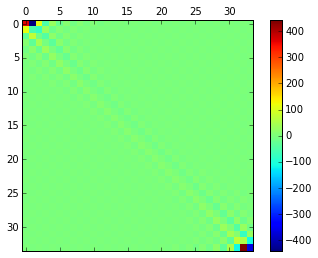

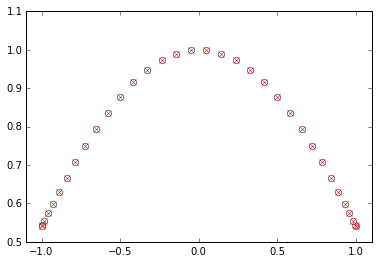

In [116]:
# Assemble the differentiation matrices
N = _Nr
j = sp.arange(N+1)
x = _r

D = sp.zeros((N+1, N+1))

## fill in the middle values (eveywhere)
Dmid = (-1.0)**(j[1:-1, None] + j[None, 1:-1]) / (x[1:-1, None] - x[None, 1:-1])
D[1:-1,1:-1] = Dmid#[1:-1, 1:-1]

## Fill in the diagonals
Ddiag = - x / (2 * (1 - x**2))
Idiag = sp.diag_indices_from(D)
D[Idiag] = Ddiag


## Fill in the top
top = 2 * (-1)**(j[1:-1]) / (1 - x[1:-1])
bot = -2 * (-1)**(N + j[1:-1]) / (1 + x[1:-1])
left = -.5 * (-1)**(j[1:-1]) / (1 - x[1:-1])
right = .5 * (-1)**(N + j[1:-1]) / (1 + x[1:-1])
D[0, 1:-1] = top
D[-1, 1:-1] = bot
D[1:-1, 0] = left
D[1:-1, -1] = right

## Fill in the corners
D[0, 0] = (2.0 * N**2 + 1) / 6.0
D[0, -1] = .5 * (-1)**N
D[-1, 0] = -.5 * (-1)**N
D[-1, -1] = - (2.0 * N**2 + 1) / 6.0


# show the matrix
f1 = plt.figure(1)
a1 = f1.add_axes([.1, .1, .8, .8])
plotD = a1.matshow(D)
f1.colorbar(plotD)

## compute a function and differentiate it
fvals = -sp.cos(x)
df = sp.dot(sp.dot(D, D), fvals)   # take the second derivative
df_true = sp.cos(x)                # second derivative

## Plot the test case for differentiation 
f2 = plt.figure(2)
a2 = f2.add_axes([.1, .1, .8, .8])
a2.plot(x, df_true, 'o', color='white')
a2.plot(x, df, 'x', color='red')
a2.set_ybound((.5, 1.1))
a2.set_xbound([-1.1, 1.1])




In [117]:
# Compute the matricies needed for the polar coordinate problem
Dlap = sp.dot(D, D)
D1 = Dlap[:Nr, :Nr]
D2 = Dlap[:Nr, Nr:]
E1 = D[:Nr, :Nr]
E2 = D[:Nr, Nr:]
R = sp.diag(1.0 / r)


